<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/LinearRegressionAssumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [12]:
ypred=lr.predict(xtest)

In [13]:
residual=ytest-ypred

1. Linear Relationship

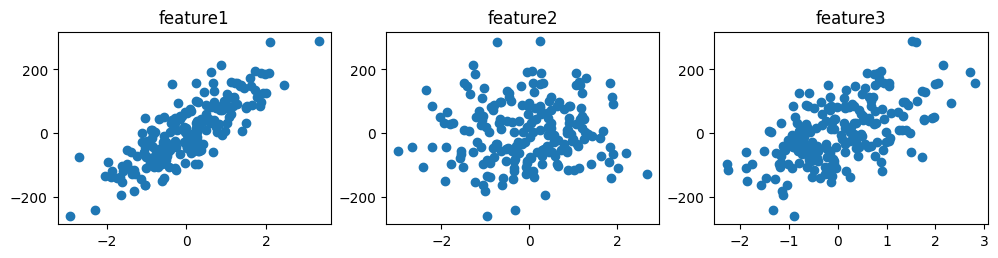

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,2.5))
ax1.scatter(df['feature1'],df['target'])
ax1.set_title('feature1')
ax2.scatter(df['feature2'],df['target'])
ax2.set_title('feature2')
ax3.scatter(df['feature3'],df['target'])
ax3.set_title('feature3')

plt.show()

2. Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(xtrain.shape[1]):
  vif.append(variance_inflation_factor(xtrain,i))

In [19]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.00195,1.011273,1.011211


<Axes: >

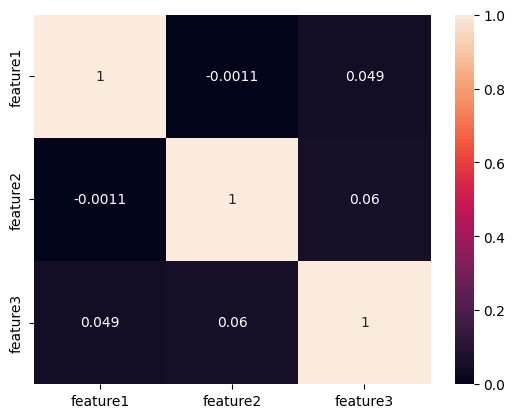

In [20]:
#another method
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

3. Normality of Residual

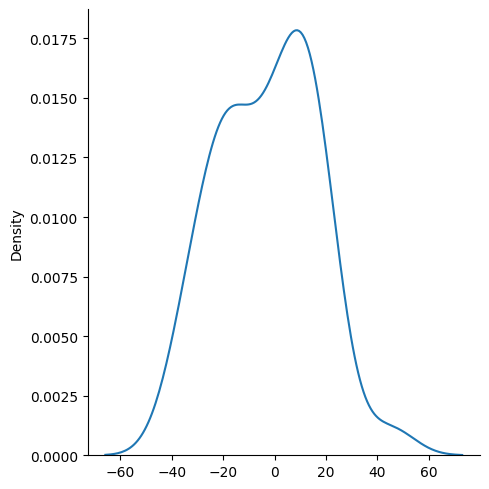

In [21]:
sns.displot(residual,kind='kde')

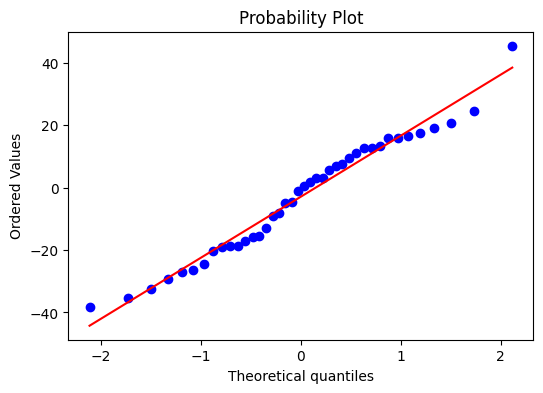

In [22]:
#QQ plot
import scipy as sp
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

4. Homoscedasticity

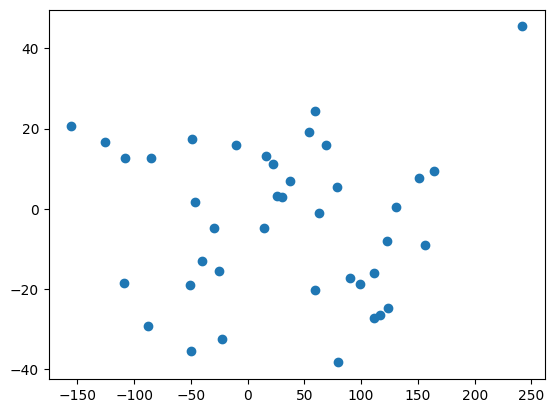

In [24]:
plt.scatter(ypred,residual)

5. Autocorrelation of Residuals

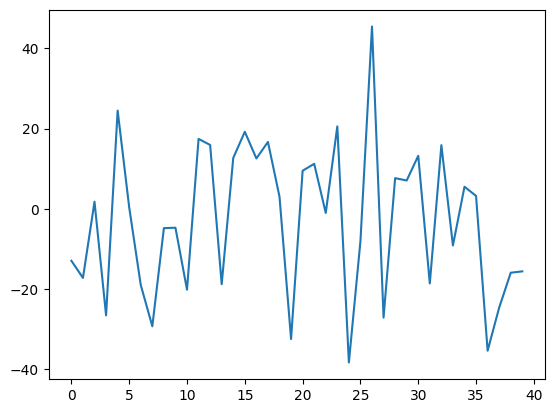

In [25]:
plt.plot(residual)